In [1]:
# Install packages
!pip install kaggle
!pip install tensorflow
!pip install pillow
!pip install numpy


In [4]:
import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from PIL import Image

In [6]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thanukanimantha","key":"055a4941ee0878d3fb7411ca88839f85"}'}

In [7]:
# Create a Kaggle directory and move the kaggle.json file there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
# Download the dataset from Kaggle
!kaggle datasets download -d alxmamaev/flowers-recognition

# Unzip the dataset
!unzip flowers-recognition.zip -d flowers


Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 98% 221M/225M [00:06<00:00, 43.8MB/s]
100% 225M/225M [00:06<00:00, 37.9MB/s]
Archive:  flowers-recognition.zip
  inflating: flowers/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flo

In [9]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define flower categories
flower_types = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Set data directory
data_dir = 'flowers/flowers'

# Initialize lists to store images and labels
images = []
labels = []

# Load and preprocess images
for label, flower in enumerate(flower_types):
    flower_dir = os.path.join(data_dir, flower)
    for img_name in os.listdir(flower_dir):
        img_path = os.path.join(flower_dir, img_name)
        img = Image.open(img_path)
        img = img.resize((128, 128))
        img = np.array(img)
        images.append(img)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the images
images = images / 255.0

# Convert labels to categorical
labels = to_categorical(labels, len(flower_types))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(flower_types), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=25)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.3232 - loss: 1.6171 - val_accuracy: 0.5741 - val_loss: 1.0926
Epoch 2/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.5665 - loss: 1.1153 - val_accuracy: 0.5810 - val_loss: 1.0217
Epoch 3/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.5859 - loss: 1.0231 - val_accuracy: 0.6285 - val_loss: 0.9654
Epoch 4/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.6345 - loss: 0.9307 - val_accuracy: 0.6435 - val_loss: 0.9052
Epoch 5/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.6551 - loss: 0.8744 - val_accuracy: 0.6725 - val_loss: 0.8540
Epoch 6/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.6733 - loss: 0.8760 - val_accuracy: 0.6817 - val_loss: 0.8113
Epoch 7/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.6726 - loss: 0.8288 - val_accuracy: 0.6979 - val_loss: 0.7988
Epoch 8/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.6987 - loss: 0.7935 - val_accuracy: 0.708

In [21]:
def predict_flower(img_path):
    img = Image.open(img_path)
    img = img.resize((128, 128))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions)

    if confidence > 0.6:
        return flower_types[predicted_class]
    else:
        return "Not in system"


Saving rose.JPG to rose (2).JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction for rose (2).JPG: rose


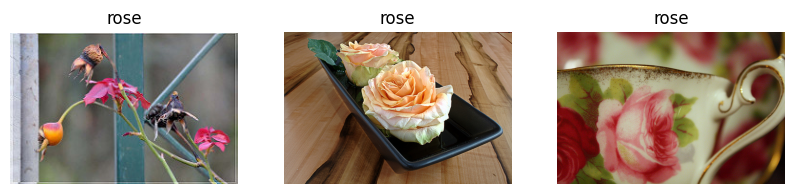

In [22]:
from google.colab import files
import matplotlib.pyplot as plt

# Function to display similar images
def display_similar_images(flower_name, num_images=3):
    # Path to the folder containing images of the predicted flower
    flower_folder = os.path.join(data_dir, flower_name)

    # Get a list of image files in the folder
    flower_images = os.listdir(flower_folder)

    # Display the first 'num_images' images
    plt.figure(figsize=(10, 5))
    for i, img_name in enumerate(flower_images[:num_images]):
        img_path = os.path.join(flower_folder, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(flower_name)
    plt.show()

# Upload an image file
uploaded = files.upload()

# Predict the flower type and display similar images
for file_name in uploaded.keys():
    predicted_flower = predict_flower(file_name)
    print(f"Prediction for {file_name}: {predicted_flower}")

    if predicted_flower != "Not in system":
        display_similar_images(predicted_flower)


In [13]:
# Save the model to Google Drive
from google.colab import drive
drive.mount('/content/drive')

model_path = '/content/drive/My Drive/flower_model.h5'
model.save(model_path)


Mounted at /content/drive
